### Table of Contents
*  [Introduction](#purpose)
*  [Gather Data](#gather_data)
*  [Assess Data](#assess_data)
*  [Findings](#findings)
*  [Cleaning](#cleaning)
   *  [Quality Issues](#quality)
   *  [Tidiness Issues](#tidy)
*  [Insights and visualization](#insights)

## Introduction <a class="anchor" id="purpose"></a>

I will gather data from 3 different sources and assess it for quality and tidiness and generate a list of issues to be dealt with.  I will then clean the data addressing the items previously listed and generate a clean dataset that is ready to analyze in more detail.  I will provide some insight on the final and clean data as well as some visualization about some parameter within the data.  This clean dataset will be saved to a csv file and stored locally.

## Gather Data <a class="anchor" id="gather_data"></a>

### Read in the different file into DataFrames

Load the necessary resources for the project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Create DataFrame of the archived Twitter records

df is the Twitter Archive Enhanced file

In [2]:
df = pd.read_csv('twitter-archive-enhanced.csv')
df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Create a dataframe for the images 

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
df_images = pd.read_csv(url, sep='\t')
df_images.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [5]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Create a datafram of the json file return from Twitter

Will not currently run as I have no credentials from Twitter.  Code has been updated to match my names.

In [6]:
#import tweepy     #Twitter API
#from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [7]:
'''
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'
'''

"\n# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter's API terms and conditions\nconsumer_key = 'HIDDEN'\nconsumer_secret = 'HIDDEN'\naccess_token = 'HIDDEN'\naccess_secret = 'HIDDEN'\n"

In [8]:
'''
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
'''

'\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n'

In [9]:
'''
tweet_ids = df.tweet_id.values
len(tweet_ids)
'''

'\ntweet_ids = df.tweet_id.values\nlen(tweet_ids)\n'

In [10]:
'''
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet-json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
'''

'\n# Query Twitter\'s API for JSON data for each tweet ID in the Twitter archive\ncount = 0\nfails_dict = {}\nstart = timer()\n# Save each tweet\'s returned JSON as a new line in a .txt file\nwith open(\'tweet-json.txt\', \'w\') as outfile:\n    # This loop will likely take 20-30 minutes to run because of Twitter\'s rate limit\n    for tweet_id in tweet_ids:\n        count += 1\n        print(str(count) + ": " + str(tweet_id))\n        try:\n            tweet = api.get_status(tweet_id, tweet_mode=\'extended\')\n            print("Success")\n            json.dump(tweet._json, outfile)\n            outfile.write(\'\n\')\n        except tweepy.TweepError as e:\n            print("Fail")\n            fails_dict[tweet_id] = e\n            pass\nend = timer()\nprint(end - start)\nprint(fails_dict)\n'

Starting with next cell, code is again functional.

In [11]:
# Read JSON file and gather 3 variables from the data
df_json = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])
with open('tweet-json.txt') as f:
    for line in f:
        data  = json.loads(line)
        tweet_id = data['id_str']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        df_json = df_json.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
                                        columns=['tweet_id', 'retweet_count', 'favorite_count']))
f.close()

df_json[:5]

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
0,892177421306343426,6514,33819
0,891815181378084864,4328,25461
0,891689557279858688,8964,42908
0,891327558926688256,9774,41048


In [12]:
df_json.reset_index(drop=True)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


## Assess Data <a class="anchor" id="assess_data"></a>

Begin assessing the archived tweets file.  All findings for Quality and Tidiness are in lists below.  [Findings](#findings)

Start assessment with Twitter Archive Enhanced DataFrame

In [13]:
df.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
          ... 
Timber       1
Obi          1
Anthony      1
Aja          1
Kaiya        1
Name: name, Length: 957, dtype: int64

In [14]:
df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [15]:
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [16]:
df[df.text.str.find('pupper')!=-1].shape

(272, 17)

In [17]:
df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

Assess the images DataFrame

In [18]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
df_images.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


Assess the JSON DataFrame

In [20]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 0
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   object
 2   favorite_count  2354 non-null   object
dtypes: object(3)
memory usage: 73.6+ KB


In [21]:
df_json.head(3)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
0,892177421306343426,6514,33819
0,891815181378084864,4328,25461


## Findings <a class="anchor" id="findings"></a>

##### Quality Issues:  
  1. tweet_id should be an object type
  2. timestamp is not datetime format
  3. expanded urls has some null values that may need addressed
  4. retweet are to be excluded from analysis but still exist in data set
  5. More than one stage exist in some records
  6. value in name of dog is none or not valid (possibly indicated by a lower case first letter)
  7. rating numerators have errors and rating denominators have errors 
  8. The number of categorical observances of dog stage don't agree with number referred to in text.  May indicate some categorical values are not recorded properly.
  9. drop columns that are not needed for this analysis

##### Tidiness Issues:  
 1. 4 categorical dog stages should be 1 column instead since the column headers are the values
 2. The 3 sources of information should be merged into 1 dataframe for better data analysis

## Clean Data <a class="anchor" id="cleaning"></a>

### Create a backup of all DataFrames

In [22]:
df_bkup = df.copy()
df_images_bkup = df_images.copy()
df_json_bkup = df_json.copy()

I will clean the individual dataframes before merging into one.  I think one better meets the requirements of tidy and there is no maintenance or future data entry where have seperate dataframes make sense.

### Quality Issues <a class="anchor" id="quality"></a>

#### Define ####    
* Change tweet_id to type object in Twitter Archive Enhaced file and in the images file

#### Code

In [23]:
df.tweet_id = df.tweet_id.astype('str')
df_images.tweet_id = df_images.tweet_id.astype('str')

#### Test 

In [24]:
print(df.info())
print(df_images.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Define ####     
* Change timestamp to datetime format

#### Code

In [25]:
df.timestamp = pd.to_datetime(df.timestamp)

#### Test

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

#### Define ####    
* Determine how to deal with nulls in the expanded urls column

##### Code

In [27]:
df[['source','expanded_urls']]

,source,expanded_urls
0,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892420643...
1,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892177421...
2,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891815181...
3,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891689557...
4,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891327558...
...,...,...
2351,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/666049248...
2352,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/666044226...
2353,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/666033412...
2354,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/666029285...


Delete the rows that are missing the expanded urls to remove the nulls.

In [28]:
df.drop(df[df.expanded_urls.isnull()].index,axis=0, inplace=True)

#### Test

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2297 non-null   object             
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2297 non-null   datetime64[ns, UTC]
 4   source                      2297 non-null   object             
 5   text                        2297 non-null   object             
 6   retweeted_status_id         180 non-null    float64            
 7   retweeted_status_user_id    180 non-null    float64            
 8   retweeted_status_timestamp  180 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2297 non-null   int64           

#### Define ####    
* Drop the retweets from the dataframe
* Drop the replies from the dataframe

#### Code

In [30]:
df.drop(df[df.retweeted_status_id.notnull()].index,axis=0,inplace=True)

In [31]:
df.drop(df[df.in_reply_to_status_id.notnull()].index, axis=0, inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2094 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2094 non-null   datetime64[ns, UTC]
 4   source                      2094 non-null   object             
 5   text                        2094 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2094 non-null   int64           

Drop the reply and retweet columns

In [33]:
df.drop(df[['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']].columns,
                                            axis=1, inplace=True)

#### Test

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   object             
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2094 non-null   int64              
 6   rating_denominator  2094 non-null   int64              
 7   name                2094 non-null   object             
 8   doggo               2094 non-null   object             
 9   floofer             2094 non-null   object             
 10  pupper              2094 non-null   object             
 11  puppo               2094 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

#### Define ####    
* Identify any records that have more than one stage 
* Determine how to deal with those records

#### Code

In [35]:
# Look for lines with multiple stages for one record
df[(df.doggo !='None') & ((df.floofer != 'None') | (df.pupper != 'None') | (df.puppo != 'None'))][['doggo','floofer','pupper','puppo']]

,doggo,floofer,pupper,puppo
191,doggo,None,None,puppo
200,doggo,floofer,None,None
460,doggo,None,pupper,None
531,doggo,None,pupper,None
575,doggo,None,pupper,None
705,doggo,None,pupper,None
733,doggo,None,pupper,None
889,doggo,None,pupper,None
956,doggo,None,pupper,None
1063,doggo,None,pupper,None


In [36]:
# print Text for these tweets
pd.set_option('display.max_colwidth', None)  # Set column width to maximum
print(df.loc[df[(df.doggo !='None') & ((df.floofer != 'None') | (df.pupper != 'None') | (df.puppo != 'None'))][['doggo','floofer','pupper','puppo']].index]['text'])

191           Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel
200     At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
460     This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
531                         Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho
575                         This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj
705     This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would p

We see that some of the posts are for multiple dogs, each with a seperate category; some are owners changing their mind about the stage of their dog; and some are just mistakes or bad post.  
I will correct some that I think appropriate and delete the remainder from the DataFrame.  
Correct: 191, 200, 460, 705  
Remove remaining 10

In [37]:
df.at[191, 'doggo'] = 'None'

In [38]:
df.at[200, 'doggo'] = 'None'

In [39]:
df.at[460, 'doggo'] = 'None'

In [40]:
df.at[705, 'pupper'] = 'None'

In [41]:
df[(df.doggo !='None') & ((df.floofer != 'None') | (df.pupper != 'None') | (df.puppo != 'None'))][['doggo','floofer','pupper','puppo']]

,doggo,floofer,pupper,puppo
531,doggo,None,pupper,None
575,doggo,None,pupper,None
733,doggo,None,pupper,None
889,doggo,None,pupper,None
956,doggo,None,pupper,None
1063,doggo,None,pupper,None
1113,doggo,None,pupper,None


Remove the remaining 7 duplicate stage records

In [42]:
# Drop the 7 records remaining that have more than one stage
df.drop(df[(df.doggo !='None') & ((df.floofer != 'None') | (df.pupper != 'None') | (df.puppo != 'None'))].index, axis=0, inplace=True)
df[(df.doggo !='None') & ((df.floofer != 'None') | (df.pupper != 'None') | (df.puppo != 'None'))].index

Int64Index([], dtype='int64')

#### Test

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2087 non-null   object             
 1   timestamp           2087 non-null   datetime64[ns, UTC]
 2   source              2087 non-null   object             
 3   text                2087 non-null   object             
 4   expanded_urls       2087 non-null   object             
 5   rating_numerator    2087 non-null   int64              
 6   rating_denominator  2087 non-null   int64              
 7   name                2087 non-null   object             
 8   doggo               2087 non-null   object             
 9   floofer             2087 non-null   object             
 10  pupper              2087 non-null   object             
 11  puppo               2087 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

In [44]:
# pd.set_option('display.max_colwidth', 25)

#### Define ####    
* Check name of dog for None or lower case first letter to see if name of dog is available
* Correct any name value possible
* Determine what to do with remaining

#### Code

In [45]:
import re

In [46]:
# Create temporary df where dog name is None or an improper name meaning does not start with a Capitol
df_tmp = df[(df.name=='None') | (df.name.str.islower())]

In [47]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 5 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            699 non-null    object             
 1   timestamp           699 non-null    datetime64[ns, UTC]
 2   source              699 non-null    object             
 3   text                699 non-null    object             
 4   expanded_urls       699 non-null    object             
 5   rating_numerator    699 non-null    int64              
 6   rating_denominator  699 non-null    int64              
 7   name                699 non-null    object             
 8   doggo               699 non-null    object             
 9   floofer             699 non-null    object             
 10  pupper              699 non-null    object             
 11  puppo               699 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2)

Check for proper name in text but see no names returned.  Tried same method looking for "name is" and "named" but again, found no proper names.

In [48]:
new_name=[]
for i in df_tmp.index:
    text = df_tmp.loc[i]['text']
    x = re.search(r"^[Tt]his is (\w+)", text)
    new_name.append(x)

In [49]:
new_name

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

No proper names found from search above.

Now remove the incorrect names in the DataFrame and leave NaN to indicate name was not available.

In [50]:
df.loc[df_tmp.index, 'name'] = np.nan

#### Test

In [51]:
df.name.value_counts()

Charlie    11
Lucy       11
Oliver     10
Cooper     10
Tucker      9
           ..
Blue        1
Mya         1
Dutch       1
Gustav      1
Kaiya       1
Name: name, Length: 928, dtype: int64

#### Define ####    
* Ratings numerators and denominators have errors. 
* Evaluate option to convert numerator and denomminator into 1 rating value by division   
   
Some of the fun of site is rating greater than 10 on a scale of 1 to 10. I will convert the numerator and denominator into a rating by division.  Since the site if for fun, have a rating greater than 1 is not a problem.  I will search the underlying data for quality issues.

#### Code

In [52]:
df['rating'] = df.rating_numerator / df.rating_denominator

In [53]:
df.rating.value_counts()

1.200000      483
1.000000      436
1.100000      418
1.300000      287
0.900000      153
0.800000       98
0.700000       51
1.400000       38
0.500000       34
0.600000       32
0.300000       19
0.400000       15
0.200000       10
0.100000        4
2.700000        1
3.428571        1
0.636364        1
177.600000      1
2.600000        1
42.000000       1
7.500000        1
0.000000        1
0.818182        1
Name: rating, dtype: int64

Assess new rating for values greater than or equal to 2 or less than 0.3

In [54]:
n = df[(df.rating >= 2) | (df.rating < 0.3)][['rating','rating_numerator','rating_denominator']].index
df[(df.rating >= 2) | (df.rating < 0.3)][['rating','rating_numerator','rating_denominator']].index

Int64Index([ 315,  516,  695,  763,  979, 1165, 1712, 1761, 1764, 1869, 1920,
            2074, 2079, 2091, 2237, 2246, 2261, 2310, 2326, 2338, 2349],
           dtype='int64')

In [55]:
def rating_fun(text):
    myList = text.split(" ")
    rating_lis = list(filter(lambda x: '/' in x, myList)) 
    return rating_lis


In [56]:
ratings_per_row = df.text.apply( lambda x: rating_fun(x) )

In [57]:
print(df.rating_numerator[n], df.rating_denominator[n] , df.rating[n])
print(ratings_per_row[n])
ratings_per_row.count()

315        0
516       24
695       75
763       27
979     1776
1165       4
1712      26
1761       2
1764       2
1869       1
1920       2
2074     420
2079       2
2091       1
2237       2
2246       2
2261       1
2310       2
2326       2
2338       1
2349       2
Name: rating_numerator, dtype: int64 315     10
516      7
695     10
763     10
979     10
1165    20
1712    10
1761    10
1764    10
1869    10
1920    10
2074    10
2079    10
2091    10
2237    10
2246    10
2261    10
2310    10
2326    10
2338    10
2349    10
Name: rating_denominator, dtype: int64 315       0.000000
516       3.428571
695       7.500000
763       2.700000
979     177.600000
1165      0.200000
1712      2.600000
1761      0.200000
1764      0.200000
1869      0.100000
1920      0.200000
2074     42.000000
2079      0.200000
2091      0.100000
2237      0.200000
2246      0.200000
2261      0.100000
2310      0.200000
2326      0.200000
2338      0.100000
2349      0.200000
Name: rating, dtype: 

2087

Since there are only 21 records that are outside the parameters I desire, these will be removed from the DataFrame.
Once the records are removed, I will drop the columns for numerator and denominator.

In [58]:
df.drop(df[(df.rating >= 2) | (df.rating < 0.3)][['rating','rating_numerator','rating_denominator']].index, axis=0, inplace=True)

In [59]:
df[(df.rating >= 2) | (df.rating < 0.3)][['rating','rating_numerator','rating_denominator']].index

Int64Index([], dtype='int64')

In [60]:
df.drop(df[['rating_numerator','rating_denominator']],axis=1,inplace=True)

#### Test

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2066 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       2066 non-null   object             
 1   timestamp      2066 non-null   datetime64[ns, UTC]
 2   source         2066 non-null   object             
 3   text           2066 non-null   object             
 4   expanded_urls  2066 non-null   object             
 5   name           1381 non-null   object             
 6   doggo          2066 non-null   object             
 7   floofer        2066 non-null   object             
 8   pupper         2066 non-null   object             
 9   puppo          2066 non-null   object             
 10  rating         2066 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(9)
memory usage: 193.7+ KB


### Tidiness Issues <a class="anchor" id="tidy"></a>

#### Define ####     
* Change categorical columns into 1 column with values, if available
* Remove the unneeded columns

#### Code

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2066 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       2066 non-null   object             
 1   timestamp      2066 non-null   datetime64[ns, UTC]
 2   source         2066 non-null   object             
 3   text           2066 non-null   object             
 4   expanded_urls  2066 non-null   object             
 5   name           1381 non-null   object             
 6   doggo          2066 non-null   object             
 7   floofer        2066 non-null   object             
 8   pupper         2066 non-null   object             
 9   puppo          2066 non-null   object             
 10  rating         2066 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(9)
memory usage: 193.7+ KB


Extract the stage of the dog and store in variable 'dog stages' and drop the columns 'doggo, floofer, pupper, puppo' since they are no longer needed.

In [63]:
df['dog_stages'] = df.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)

In [64]:
df.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)

#### Test

In [65]:
print(df.info())
df.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2066 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       2066 non-null   object             
 1   timestamp      2066 non-null   datetime64[ns, UTC]
 2   source         2066 non-null   object             
 3   text           2066 non-null   object             
 4   expanded_urls  2066 non-null   object             
 5   name           1381 non-null   object             
 6   rating         2066 non-null   float64            
 7   dog_stages     345 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), object(6)
memory usage: 145.3+ KB
None


,tweet_id,timestamp,source,text,expanded_urls,name,rating,dog_stages
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,1.3,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,1.3,NaN


#### Define ####    
* Merge all 3 dataframes into 1 using the tweet_id as the key

#### Code

In [66]:
df_all = pd.merge(df, df_json, on='tweet_id', how='left')

In [67]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2066 entries, 0 to 2065
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2066 non-null   object             
 1   timestamp       2066 non-null   datetime64[ns, UTC]
 2   source          2066 non-null   object             
 3   text            2066 non-null   object             
 4   expanded_urls   2066 non-null   object             
 5   name            1381 non-null   object             
 6   rating          2066 non-null   float64            
 7   dog_stages      345 non-null    object             
 8   retweet_count   2066 non-null   object             
 9   favorite_count  2066 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(8)
memory usage: 177.5+ KB


In [68]:
df_all = pd.merge(df_all, df_images, on='tweet_id', how='left')

#### Test

In [69]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2066 entries, 0 to 2065
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2066 non-null   object             
 1   timestamp       2066 non-null   datetime64[ns, UTC]
 2   source          2066 non-null   object             
 3   text            2066 non-null   object             
 4   expanded_urls   2066 non-null   object             
 5   name            1381 non-null   object             
 6   rating          2066 non-null   float64            
 7   dog_stages      345 non-null    object             
 8   retweet_count   2066 non-null   object             
 9   favorite_count  2066 non-null   object             
 10  jpg_url         1944 non-null   object             
 11  img_num         1944 non-null   float64            
 12  p1              1944 non-null   object             
 13  p1_conf         1944 non-null   f

Check the count of data in 'dog stages'

In [70]:
df_all.dog_stages.value_counts()

pupper     236
doggo       76
puppo       29
floofer      4
Name: dog_stages, dtype: int64

In [71]:
df_all.head(2)

,tweet_id,timestamp,source,text,expanded_urls,name,rating,dog_stages,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,1.3,NaN,8853,39467,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,1.3,NaN,6514,33819,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### Save the cleaned dataset to a csv file

In [72]:
df_all.to_csv('twitter_archive_master.csv')

## Insights and Visualization of the Data <a class="anchor" id="insights"></a>

Average ratings by dog stages, including null stage

In [73]:
print('Average rating for Puppo   : ',round((df_all[df_all.dog_stages=='puppo']['rating'].mean()),2))
print('Average rating for Pupper  : ',round((df_all[df_all.dog_stages=='pupper']['rating'].mean()),2))
print('Average rating for Floofer : ',round((df_all[df_all.dog_stages=='floofer']['rating'].mean()),2))
print('Average rating for Doggo   : ',round((df_all[df_all.dog_stages=='doggo']['rating'].mean()),2))
print('Average rating for no stage: ',round((df_all[df_all.dog_stages.isnull()]['rating'].mean()),2))

Average rating for Puppo   :  1.21
Average rating for Pupper  :  1.06
Average rating for Floofer :  1.23
Average rating for Doggo   :  1.17
Average rating for no stage:  1.06


Total number of records by dog stage with data

In [74]:
print('# of records in stage Puppo  :',df_all[df_all.dog_stages=='puppo']['tweet_id'].count())
print('# of records in stage Pupper :',df_all[df_all.dog_stages=='pupper']['tweet_id'].count())
print('# of records in stage Floofer:',df_all[df_all.dog_stages=='floofer']['tweet_id'].count())
print('# of records in stage Doggo  :',df_all[df_all.dog_stages=='doggo']['tweet_id'].count())

# of records in stage Puppo  : 29
# of records in stage Pupper : 236
# of records in stage Floofer: 4
# of records in stage Doggo  : 76


Top ten most popular dog breeds in stage Pupper, the stage with the most records

In [75]:
df_pupper = df_all[df_all.dog_stages=='pupper']

In [76]:
df_pupper[df_pupper.p1_dog==True]['p1'].value_counts().head(10)

golden_retriever      18
Pembroke              10
Labrador_retriever     9
pug                    8
Pomeranian             6
toy_poodle             5
Lakeland_terrier       5
Chihuahua              5
Samoyed                4
Shetland_sheepdog      4
Name: p1, dtype: int64

Find the top 500 favorite tweets for this time period based on Favorite Count

In [77]:
df_favor = df_all.loc[df_all.favorite_count.sort_values(ascending=False).index].head(500)

In [78]:
list1 = df_favor[df_favor.p1_dog==True]['p1'].str.title().value_counts().head(25)
list1[:5]

Golden_Retriever      53
Labrador_Retriever    32
Pembroke              29
Chihuahua             17
Samoyed               15
Name: p1, dtype: int64

By looking at the 500 highest ranked favorite tweets and excluding those with no identification of being a dog, we can see that the Golden Retriever is the most popular breed in the favorites tweets followed by the Labrador Retriever, Pembroke, and Chihuahua.

What are the most common dog breeds recognized by the neural network in the entire dataset with the highest probability?

In [79]:
list2 = df_all[df_all.p1_dog==True]['p1'].str.title().value_counts().head(25)
list2[:5]

Golden_Retriever      132
Labrador_Retriever     94
Pembroke               88
Chihuahua              78
Pug                    54
Name: p1, dtype: int64

Create DataFrames for each list

In [80]:
df1 = pd.DataFrame(list1)
df1.head(3)

,p1
Golden_Retriever,53
Labrador_Retriever,32
Pembroke,29


In [81]:
df2 = pd.DataFrame(list2)
df2.head()

,p1
Golden_Retriever,132
Labrador_Retriever,94
Pembroke,88
Chihuahua,78
Pug,54


Merge the 2 into 1 new DataFrame for better analysis

In [82]:
df3 = pd.merge(df1, df2, left_index=True, right_index=True, how='outer')
df3.columns = ['favorites_count', 'neural_network_count']
df3.tail()

,favorites_count,neural_network_count
Shetland_Sheepdog,4.0,18.0
Shih-Tzu,NaN,17.0
Siberian_Husky,4.0,20.0
Staffordshire_Bullterrier,6.0,19.0
Toy_Poodle,4.0,37.0


Create % of breed against each list's total respectively and add to the DataFrame

In [83]:
df3['fav_%'] = df3.favorites_count / df3.favorites_count.count()
df3['nn_%'] = df3.neural_network_count / df3.neural_network_count.count()
df3 = df3[['favorites_count','fav_%','neural_network_count','nn_%']]
df3[['fav_%','nn_%']] = df3[['fav_%','nn_%']].fillna(0)
df3.head()

,favorites_count,fav_%,neural_network_count,nn_%
Basset,6.0,0.24,NaN,0.00
Beagle,NaN,0.00,17.0,0.68
Border_Terrier,5.0,0.20,NaN,0.00
Cardigan,8.0,0.32,17.0,0.68
Chesapeake_Bay_Retriever,6.0,0.24,23.0,0.92


Compare the top 500 tweets that are dogs against the entire table of records that are dogs.

Plot a comparison between the ratio of dogs by breed from the top 500 tweets against the total ratio of dogs by breed from the cleaned DataFrame

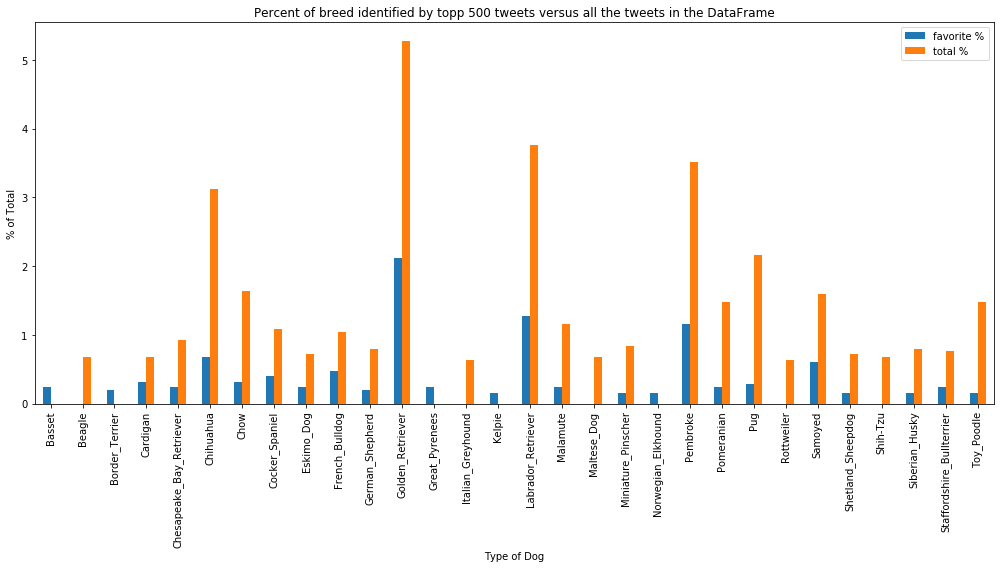

In [84]:
plot_data = df3[['fav_%','nn_%']]

plot_data.plot(kind='bar', figsize=(14,8))
plt.title('Percent of breed identified by topp 500 tweets versus all the tweets in the DataFrame')
plt.xlabel('Type of Dog')
plt.ylabel('% of Total')
plt.legend(['favorite %', 'total %'])
plt.tight_layout();

Plot a bar chart to compare the count of breed in the top 500 favorites tweets against the total count of breeds in the cleaned DataFrame

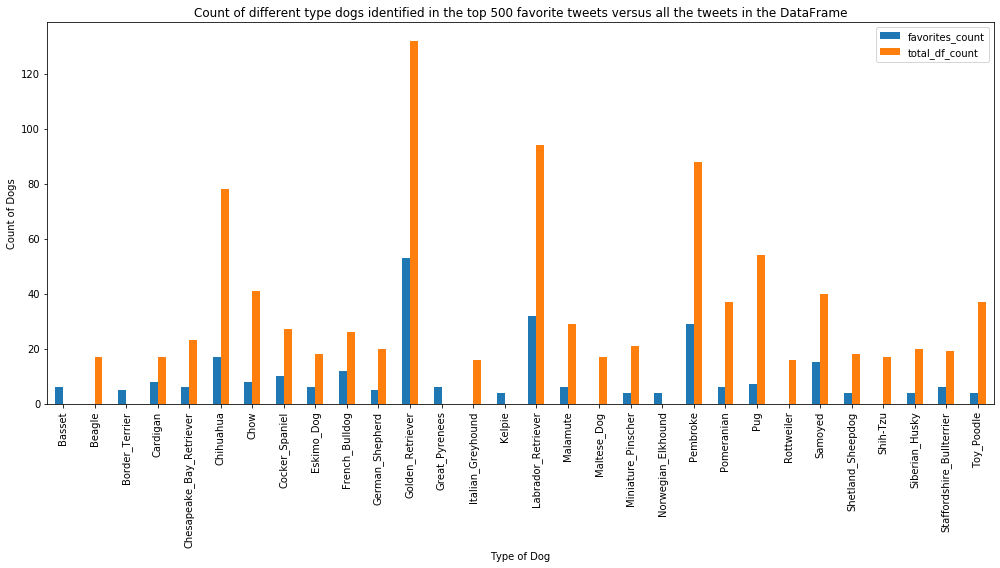

In [85]:
plot_data = df3[['favorites_count','neural_network_count']]

plot_data.plot(kind='bar', figsize=(14,8))
plt.title('Count of different type dogs identified in the top 500 favorite tweets versus all the tweets in the DataFrame')
plt.xlabel('Type of Dog')
plt.ylabel('Count of Dogs')
plt.legend(['favorites_count','total_df_count'])
plt.tight_layout()